# Best LSTMs vs M4 data heat map

## Imports

In [21]:
import json
import os

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from collections import defaultdict

## Load data

In [2]:
M4_RESULTS_PATH='../../data/baseline/results/vs_m4.json'

In [3]:
with open(M4_RESULTS_PATH, 'r') as file:
    data = json.load(file)

In [4]:
data

[{'base_model': 'gemini-pro',
  'results_against_all_llms': [{'arxiv_chatGPT': {'test_loss': 1.277238901922519,
     'test_acc': 59.28333333333333,
     'test_f1': 0.38010657193605685,
     'test_recall': 0.24966666666666668,
     'test_precision': 0.79596174282678,
     'test_brier': 0.34646813875064353,
     'test_auc_tuple': [0.7510013333333334,
      [0.0,
       0.0,
       0.0,
       0.0003333333333333333,
       0.0003333333333333333,
       0.001,
       0.001,
       0.0013333333333333333,
       0.0013333333333333333,
       0.0016666666666666668,
       0.0016666666666666668,
       0.002,
       0.002,
       0.0026666666666666666,
       0.0026666666666666666,
       0.003,
       0.003,
       0.0033333333333333335,
       0.0033333333333333335,
       0.004,
       0.004,
       0.004333333333333333,
       0.004333333333333333,
       0.004666666666666667,
       0.004666666666666667,
       0.005,
       0.005,
       0.005333333333333333,
       0.005333333333333333,

## Plot heat map

In [9]:
def plot_heat_map(data, metric='test_acc'):
    heatmap_data = []

    for item in data:
        base_model = item['base_model']
        results = {}
        results['base_model'] = base_model
        
        for dataset_result in item['results_against_all_llms']:
            for model_name, model_data in dataset_result.items():
                results[model_name] = model_data[metric]
        
        heatmap_data.append(results)
    
    # Create DataFrame
    df = pd.DataFrame(heatmap_data)
    df.set_index('base_model', inplace=True)
    df = df.sort_index(axis=1)
    
    plt.figure(figsize=(16,5))
    ax = sb.heatmap(df, annot=True, annot_kws={"size": 10}, cmap='coolwarm', linewidths=0, cbar_kws={'label': f'{metric}'}, )
    ax.set(xlabel="", ylabel="")
    ax.set_aspect('equal')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)

arxiv_chatGPT
arxiv_bloomz
arxiv_flant5
arxiv_davinci
arxiv_cohere
wikihow_cohere
wikihow_chatGPT
wikihow_dolly2
wikihow_bloomz
wikihow_davinci
wikipedia_cohere
wikipedia_chatgpt
wikipedia_davinci
wikipedia_bloomz
wikipedia_dolly
reddit_bloomz
reddit_davinci
reddit_cohere
reddit_flant5
reddit_dolly
reddit_chatGPT
arxiv_chatGPT
arxiv_bloomz
arxiv_flant5
arxiv_davinci
arxiv_cohere
wikihow_cohere
wikihow_chatGPT
wikihow_dolly2
wikihow_bloomz
wikihow_davinci
wikipedia_cohere
wikipedia_chatgpt
wikipedia_davinci
wikipedia_bloomz
wikipedia_dolly
reddit_bloomz
reddit_davinci
reddit_cohere
reddit_flant5
reddit_dolly
reddit_chatGPT
arxiv_chatGPT
arxiv_bloomz
arxiv_flant5
arxiv_davinci
arxiv_cohere
wikihow_cohere
wikihow_chatGPT
wikihow_dolly2
wikihow_bloomz
wikihow_davinci
wikipedia_cohere
wikipedia_chatgpt
wikipedia_davinci
wikipedia_bloomz
wikipedia_dolly
reddit_bloomz
reddit_davinci
reddit_cohere
reddit_flant5
reddit_dolly
reddit_chatGPT
arxiv_chatGPT
arxiv_bloomz
arxiv_flant5
arxiv_davinci
a

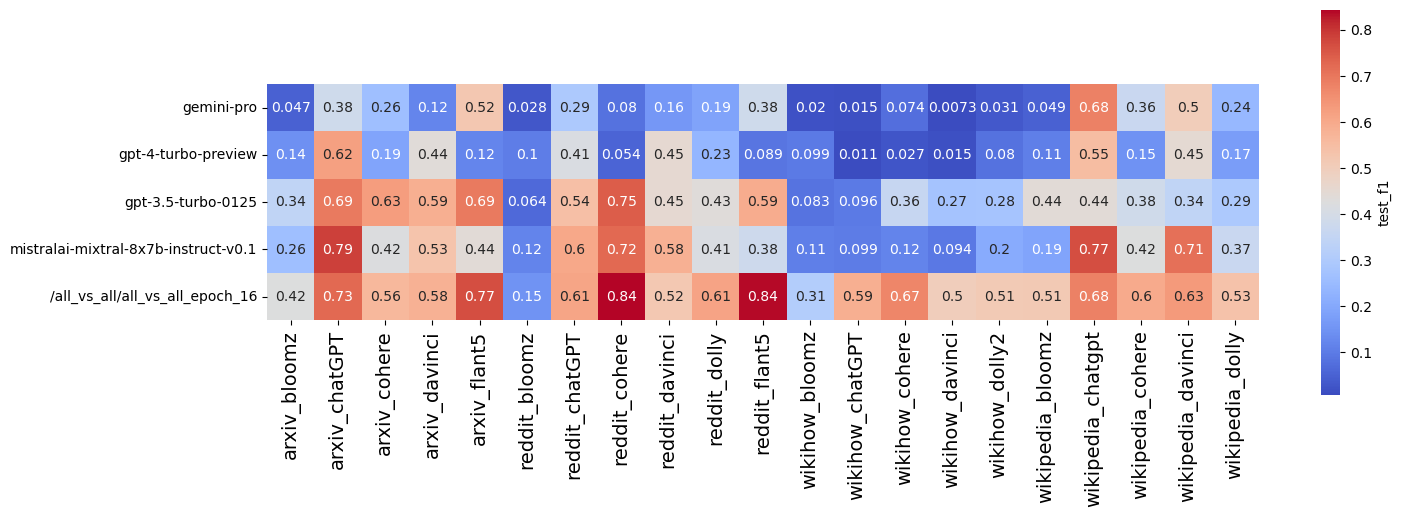

In [8]:
plot_heat_map(data, metric='test_f1')

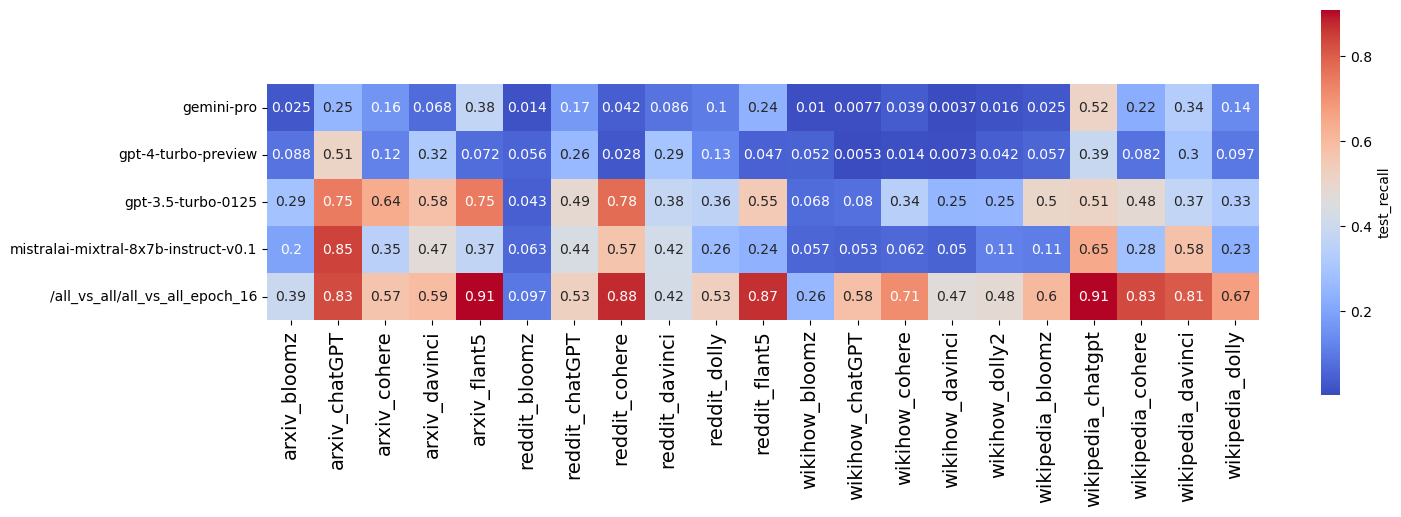

In [39]:
plot_heat_map(data, metric='test_recall')

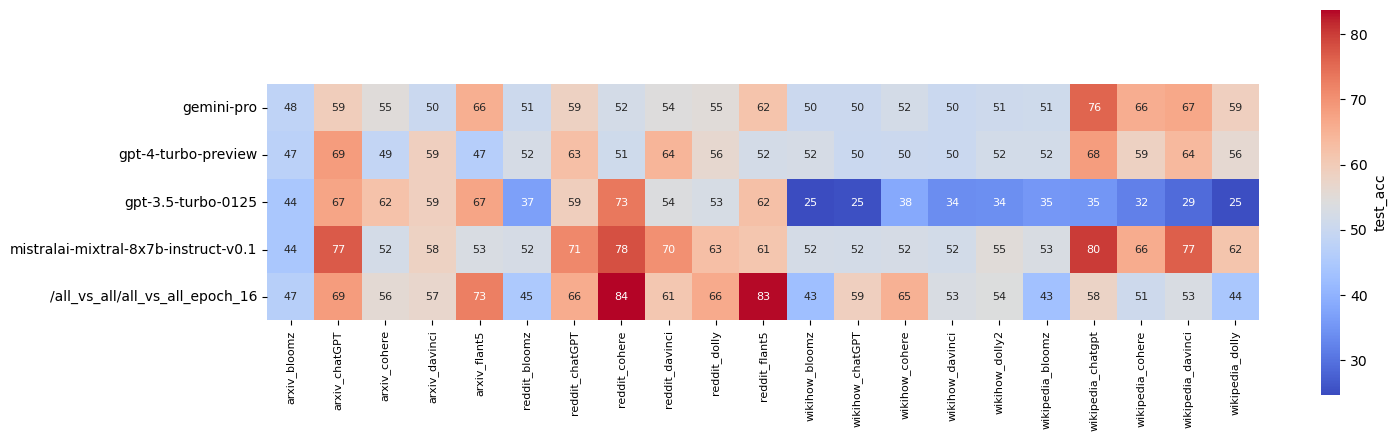

In [31]:
plot_heat_map(data, metric='test_acc')

## Average the metrics by domain

## Average the metrics by LLM

In [17]:
metrics_to_average = [
    "test_loss",
    "test_acc",
    "test_f1",
    "test_recall",
    "test_precision",
    "test_brier",
]

In [30]:
DOMAIN_COUNT_PER_LLM = 4

In [44]:
llm_average_data = []

In [50]:
for item in data:
    base_model = item['base_model']
    results = {}
    results['base_model'] = base_model
    results['results_against_all_llms'] = []
    
    # Initialize dictionaries to accumulate the metrics and count the occurrences
    metrics_sum = defaultdict(lambda: defaultdict(float))
    metrics_count = defaultdict(lambda: defaultdict(int))

    # Iterate over the results to accumulate metrics
    for result in item['results_against_all_llms']:
        for key, metrics in result.items():
            _, llm_name = key.rsplit('_', 1)
            for metric in metrics_to_average:
                metrics_sum[llm_name][metric] += metrics[metric]
                metrics_count[llm_name][metric] += 1

    # Calculate the average for each metric based on the domain
    averages = defaultdict(dict)
    for llm_name, metrics in metrics_sum.items():
        for metric, total in metrics.items():
            averages[llm_name][metric] = total / metrics_count[llm_name][metric]
        
    for average_results in averages:
        results['results_against_all_llms'].append({average_results: averages[average_results]})

    llm_average_data.append(results)

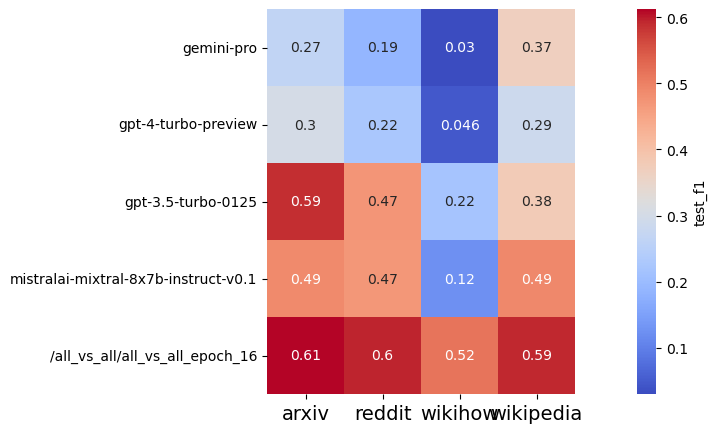

In [53]:
plot_heat_map(domain_average_data, metric='test_f1')